# いきなりデートの利用者情報分析

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import pymysql
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 14,4.5
rcParams['figure.dpi'] = 200
%matplotlib inline

In [19]:
try:
    conn = pymysql.connect(host='hostname', user='username', passwd='password', db='dbname', charset='utf8')
    cur = conn.cursor(pymysql.cursors.DictCursor)
except:
    print("Unexpected DB connect Error:", sys.exc_info()[0])

0

## 利用者情報リスト表示

In [20]:
df = pd.read_sql_query("SELECT * FROM ikinariDate ORDER BY rgst_date", conn)
df = df.replace('\t',' ', regex=True)
df

,rgst_date,univ,job,age,sex,updated_at
0,01/01 13:21,早稲田大学,IT企画営業,26,男性,2018-01-01 16:06:42
1,01/01 15:39,神奈川県立保健福祉大学,医療関連,25,女性,2018-01-01 16:06:42
2,01/01 16:05,同志社大学,会計士・税理士,38,男性,2018-01-01 16:06:42
3,01/01 16:24,東京大学,インフラ 総合職,26,男性,2018-01-01 16:06:42
4,01/01 16:49,明治学院大学,IT企画営業,24,女性,2018-01-01 16:06:42
5,01/01 16:51,京都大学,証券 総合職,28,男性,2018-01-01 16:06:42
6,01/01 17:27,早稲田大学,広告代理店 総合職,33,男性,2018-01-01 16:06:42
7,01/01 17:56,京都工芸繊維大学,ITエンジニア,27,男性,2018-01-01 16:06:42
8,01/01 20:04,一橋大学,学生,21,女性,2018-01-01 16:06:42
9,01/01 20:48,大阪市立大学,マーケティングリサーチャー,32,女性,2018-01-01 16:06:42


## 男女人数集計

In [21]:
df_sex = df[['sex']].apply(pd.value_counts)
df_sex

,sex
女性,1372
男性,938


## 男女比円グラフ

(-1.1216384228267207,
 1.1336362342195319,
 -1.1183223760984038,
 1.1008724940999239)

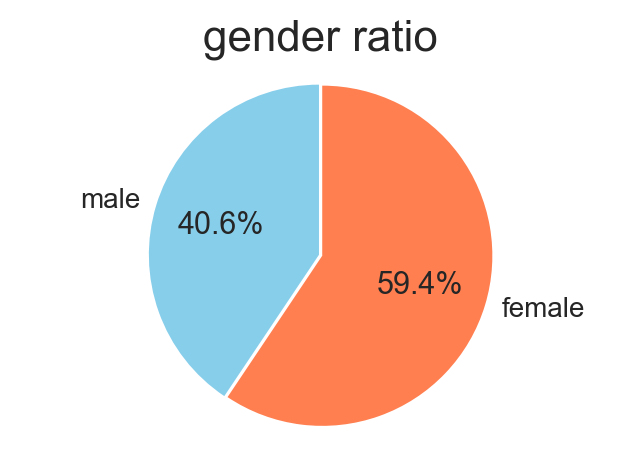

In [22]:
df_sex = df[['sex']].apply(pd.value_counts)
plt.style.use('ggplot')
plt.rcParams['font.size'] = 11.0
label = ["female", "male"]
colors = ["coral", "skyblue"]
plt.figure(figsize=(2.5,2.5), dpi=200)
plt.title("gender ratio")

(_, texts, autotexts) = plt.pie(df_sex, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%", colors=colors, explode=[0.02, 0])
for t in texts:
  t.set_size(10)
plt.subplots_adjust(left=0, right=1.2)
plt.axis('equal')

## 男女別年齢ヒストグラム

(array([  28.,   41.,   57.,  137.,  185.,  174.,  187.,  135.,  159.,
          94.,   45.,   43.,   46.,   14.,   16.,    5.,    2.,    2.,
           2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 20.        ,  20.96153846,  21.92307692,  22.88461538,
         23.84615385,  24.80769231,  25.76923077,  26.73076923,
         27.69230769,  28.65384615,  29.61538462,  30.57692308,
         31.53846154,  32.5       ,  33.46153846,  34.42307692,
         35.38461538,  36.34615385,  37.30769231,  38.26923077,
         39.23076923,  40.19230769,  41.15384615,  42.11538462,
         43.07692308,  44.03846154,  45.        ]),
 <a list of 26 Patch objects>)

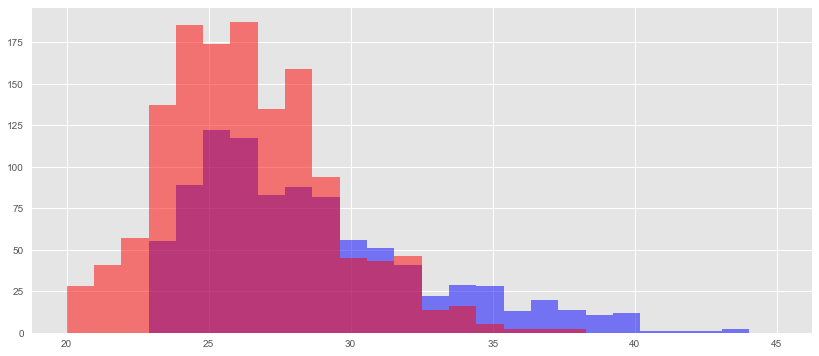

In [23]:
dfmen_age = df[df['sex'] =='男性'].age
dfwomen_age = df[df['sex'] =='女性'].age
plt.figure(figsize=(14,6))
plt.hist(dfmen_age, bins = 26, range = (20, 45),alpha = 0.5, color = "blue")
plt.hist(dfwomen_age, bins = 26, range = (20, 45),alpha = 0.5, color = "red")

## 男女別年齢ヒストグラム（別ver）

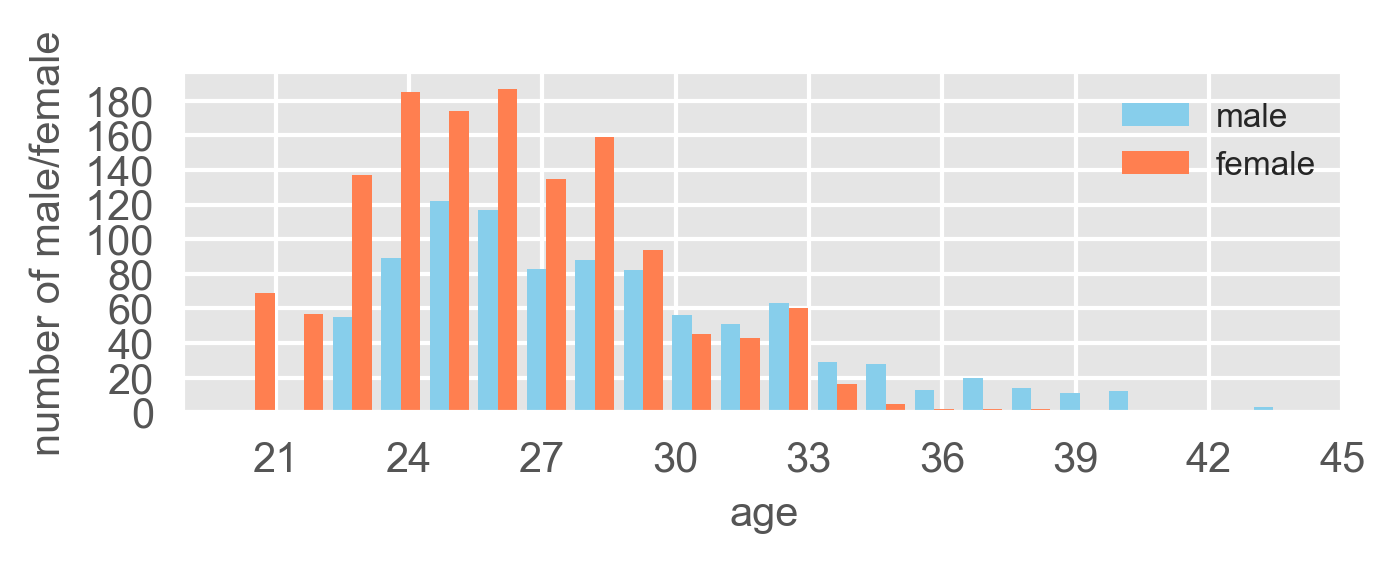

In [24]:
import matplotlib.ticker as ticker

plt.rcParams["font.size"] = 12
plt.figure(figsize=(5,1.5), dpi=300)
colors = ["skyblue", "coral"]

# X軸の数字をオフセットを使わずに表現する
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

# X軸の数字が必ず整数になるようにする
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
# Y軸の数字が必ず整数になるようにする
plt.gca().get_yaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel('age', fontsize=10)
plt.ylabel('number of male/female', fontsize=10)

plt.hist([dfmen_age, dfwomen_age],bins=22, stacked=False, color=colors)
plt.legend(["male", "female"],fontsize=8)

## 男女合算年齢集計表

In [25]:
df[['age']].apply(pd.value_counts).sort_index(ascending=True)

,age
20,28
21,41
22,57
23,192
24,274
25,296
26,304
27,218
28,247
29,176


## 年齢集計表（男）

In [26]:
df[df['sex'] =='男性'][['age']].apply(pd.value_counts).sort_index(ascending=True)

,age
23,55
24,89
25,122
26,117
27,83
28,88
29,82
30,56
31,51
32,41


## 年齢集計表（女）

In [27]:
df[df['sex'] =='女性'][['age']].apply(pd.value_counts).sort_index(ascending=True)

,age
20,28
21,41
22,57
23,137
24,185
25,174
26,187
27,135
28,159
29,94


## 出身大学（男）

In [28]:
df[df['sex'] =='男性'][['univ']].apply(pd.value_counts).rename(columns={'univ': '人数'}, inplace=False)

,人数
慶應義塾大学,106
早稲田大学,94
東京大学,62
京都大学,61
大阪大学,33
立命館大学,33
中央大学,29
法政大学,28
明治大学,28
立教大学,27


## 出身大学（女）

In [29]:
df[df['sex'] =='女性'][['univ']].apply(pd.value_counts).rename(columns={'univ': '人数'}, inplace=False)

,人数
早稲田大学,84
慶應義塾大学,81
立教大学,39
明治大学,32
上智大学,31
関西学院大学,31
青山学院大学,29
関西大学,27
立命館大学,23
同志社大学,22


## 職種（男）

In [30]:
df[df['sex'] =='男性'][['job']].apply(pd.value_counts).rename(columns={'job': '人数'}, inplace=False)

,人数
ITエンジニア,114
コンサル,68
メーカー企画営業,66
IT企画営業,53
メーカー開発,50
経営者・役員,44
広告代理店 総合職,38
インフラ 総合職,38
銀行 総合職,37
金融関連,32


## 職種（女）

In [31]:
df[df['sex'] =='女性'][['job']].apply(pd.value_counts).rename(columns={'job': '人数'}, inplace=False)

,人数
その他,119
学生,100
人材 総合職,55
金融関連,52
メーカー企画営業,49
看護師,47
IT企画営業,46
メーカー事務職,45
ITエンジニア,41
IT事務職,39


## 女性の職種が「その他」の人の年齢分布

In [32]:
df[(df['sex'] =='女性') & (df['job'] == 'その他')][['age']].apply(pd.value_counts)

,age
24,20
26,14
25,14
29,11
28,11
27,11
23,10
22,7
32,6
30,6


## 職種（男女合算）

In [33]:
df[['job']].apply(pd.value_counts)

,job
ITエンジニア,155
その他,135
メーカー企画営業,115
学生,105
IT企画営業,99
コンサル,90
金融関連,84
人材 総合職,73
広告代理店 総合職,72
銀行 総合職,69


In [34]:
cur.close()
conn.close()